<center><h1><b><span style="color:blue">Histogramming & visualisation</span></b></h1></center>

&nbsp;<br>
This is not an under-statement - **histograms are ubiquitous in Particle Physics!** This being said, and as far as the (general) scientific Python ecosystem is concerned, histograms aren't quite seen as first-class citizens ... Would you then be surprised to know that histogramming saw a lot of developments in our field?

### **Quick intro to the following packages**
- `histoprint` - pretty print of NumPy (and other) histograms to the console.
- `boost-histogram` - fast and flexible multi-dimensional histograms and profiles.
- `Hist` - analyst-friendly front-end for boost-histogram.
- `mplhep` - HEP domain-specific add-ons to matplotlib.

**Important note:** much of the functionality in these packages significantly enhances the general scientific ecosystem and is at all not (HEP) domain specific!

**Important note (2):** the fact that there is some overlap in some of the functionality these packages provide may be overwhelming at first - no different from the fact that very many Python libraries exist for visualisation out there, actually.
Remember, the development of these packages are largely driven by the community (needs and feedback). See this as a motivation to contribute towards the most useful and best features.

&nbsp;<br>

<center><h2><b><span style="color:green">histoprint - pretty print of NumPy (and other) histograms to the console</span></b></h2></center>

An introduction to `histoprint` very largely based on the README, see https://github.com/scikit-hep/histoprint.

The package is mainly meant to be used on the console; else for quick and trivial displays of 1-dimensional histograms.

In [1]:
import numpy as np

from histoprint import text_hist, print_hist

`text_hist(...)`, the simplest ever thin wrapper for `numpy.histogram`:

In [2]:
text_hist(
    np.random.randn(1000), bins=[-5, -3, -2, -1, -0.5, 0, 0.5, 1, 2, 3, 5], title="Variable bin widths"
)

                                                                  Variable bin widths                                                                  
 -5.000 _                                                                                                                                     195/row ╷
         
         
         
         
         
 -3.000 _
         █████
         █████
 -2.000 _█████
         ███████████████████████████████████
         ███████████████████████████████████
 -1.000 _███████████████████████████████████
 -0.500 _█████████████████████████████████████████████████████████████████████████████████████████████████████████████
  0.000 _██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
  0.500 _████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
  1.000 _██████████████████████████████████

(array([  0,  22, 145, 150, 195, 182, 168, 124,  14,   0], dtype=int64),
 array([-5. , -3. , -2. , -1. , -0.5,  0. ,  0.5,  1. ,  2. ,  3. ,  5. ]))

In [3]:
h_numpy = np.histogram(np.random.normal(0, 1, 100000), bins=20, range=(-5, 5))
h_numpy

(array([    0,     6,    20,    97,   470,  1647,  4370,  9018, 15153,
        19200, 19077, 14951,  9305,  4426,  1630,   501,   102,    23,
            2,     2], dtype=int64),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]))

In [4]:
A = np.random.randn(1000) - 2
B = np.random.randn(1000)
C = np.random.randn(1000) + 2
D = np.random.randn(500) * 2

histA = np.histogram(A, bins=15, range=(-5, 5))
histB = np.histogram(B, bins=15, range=(-5, 5))
histC = np.histogram(C, bins=15, range=(-5, 5))
histD = np.histogram(D, bins=15, range=(-5, 5))
histAll = ([histA[0], histB[0], histC[0], histD[0]], histA[1])

# print_hist can be used to print multiple histograms at once
# (or just to print a single one as returned by numpy.histogram)
print_hist(histAll, title="Overlays", labels="ABCDE")
print_hist(
    histAll,
    title="Stacks",
    stack=True,
    symbols="      ",
    bg_colors="rgbcmy",
    labels="ABCDE",
)
print_hist(
    histAll,
    title="Summaries",
    symbols=r"=|\/",
    fg_colors="0",
    bg_colors="0",
    labels=["AAAAAAAAAAAAAAAA", "B", "CCCCCCCCCCCCC", "D"],
    summary=True,
)

                                                                       Overlays                                                                        
 -5.000 _                                                                                                                                     140/row ╷
          ⃫ ⃫ ⃫
 -4.333 _ ⃫ ⃫ ⃫
          ⃫ ⃫ ⃫ ⃫ ⃫ ⃫████████████
 -3.667 _ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫████████████
          ⃫ ⃫ ⃫ ⃫ ⃫██████████████████████████████████████████████
 -3.000 _ ⃫ ⃫ ⃫ ⃫ ⃫██████████████████████████████████████████████
         │⃫│⃫│⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫█████████████████████████████████████████████████████████████████████████████████████████
 -2.333 _│⃫│⃫│⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫ ⃫█████████████████████████████████████████████████████████████████████████████████████████
         │⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│͏████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
 -1.667 _│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│⃫│

**Note:** the last example does not use terminal colors, so it can be copied as text.

### **1. Command-line interface**

`Histoprint` comes with a simple command-line interface to create histograms of tabulated data.
It can read in files or take data directly from STDIN:

In [5]:
!histoprint --help

Usage: histoprint [OPTIONS] INFILE

  Read INFILE and print a histogram of the contained columns.

  INFILE can be '-', in which case the data is read from STDIN.

Options:
  -b, --bins TEXT                 Number of bins or space-separated bin edges.
  -t, --title TEXT                Title of the histogram.
  --stack / --nostack             Stack the histograms.
  -s, --summary / -S, --nosummary
                                  Print summary statistics.
  -l, --label TEXT                Labels for the data, one for each column.
  --symbols TEXT                  Symbol cycle for multiple histograms.
                                  Choices & default: ' |=/\'
  --fg-colors TEXT                Colour cycle for foreground colours.
                                  Default: 'WWWWW', Choices:
                                  '0rgbcmykwRGBCMYKW'
  --bg-colors TEXT                Colour cycle for background colours.
                                  Default: 'K0000', Choices:
             

### **2. Interoperability - support for other histogram types**

`Histoprint` can directly plot other (more fancy) types of histograms if they follow the PlottableProtocol conventions,
or offer a way of being converted to the NumPy format.
Currently this means they have to expose a numpy() or to_numpy() method.
Both the TH1 histograms of uproot4, as well as the histograms of boost-histogram, are supported like this:

In [6]:
import boost_histogram as bh

hist = bh.Histogram(bh.axis.Regular(20, -3, 3))
hist.fill(np.random.randn(1000))
print_hist(hist, title="Boost Histogram")

import uproot
file = uproot.open("http://scikit-hep.org/uproot3/examples/Event.root")
hist = file["htime"]
print_hist(hist, title="uproot TH1")

                                                                    Boost Histogram                                                                    
 -3.000 _                                                                                                                                     121/row ╷
 -2.700 _████
 -2.400 _███
 -2.100 _███
 -1.800 _███████████████████████████
 -1.500 _███████████████████████████████████
 -1.200 _███████████████████████████████████████████████████
 -0.900 _████████████████████████████████████████████████████████████████████
 -0.600 _█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
 -0.300 _█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
  0.000 _██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
  0.300 _████

&nbsp;<br><center><img src="images/logo_boost-histogram.png" alt="boost-histogram package logo" style="width: 150px;"/></center>

<center><h2><b><span style="color:green">Fast and flexible multi-dimensional histograms and profiles</span></b></h2></center>

* Python bindings for the C++14 Boost.Histogram library.
* No external dependency.
* Very fast and feature-rich.
* Multi-dimensional histograms and profiles.
* Supports weighted and unweighted data.
* And much much more, see the [docs](https://boost-histogram.readthedocs.io/).

<div class="alert alert-info">

<b>Acknowledgements</b>

This mini-tutorial is largely based on material by Henry Schreiner (Princeton University), with minor modifications.
</div>

### **1. Basic 1D histogram**

In [7]:
import boost_histogram as bh

import numpy as np
import matplotlib.pyplot as plt

Let's generate some data and create a histogram:

In [8]:
data1 = np.random.normal(3.5, 2.5, size=1_000_000)

h1 = bh.Histogram(bh.axis.Regular(40, -2, 10))

In [9]:
h1.fill(data1)

Histogram(Regular(40, -2, 10), storage=Double()) # Sum: 981458.0 (1000000.0 with flow)

Let's explicitly check to see how many entries are in the histogram:

In [10]:
h1.sum()

981458.0

What happened to the missing items? They are in the underflow and overflow bins ;-):

In [11]:
h1.sum(flow=True)

1000000.0

As is ROOT, overflow bins are on by default. We can turn them off, but they enable some powerful things such as projections.

Make sure things visually look OK:

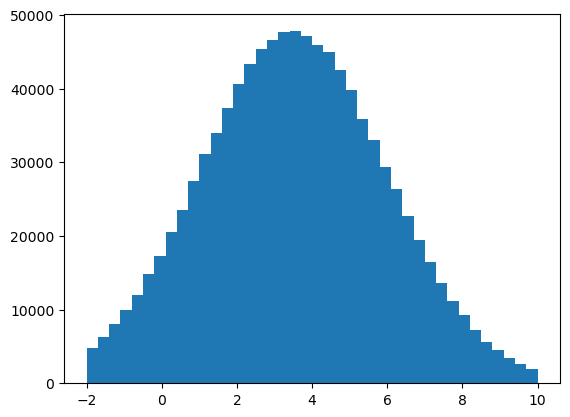

In [12]:
plt.bar(h1.axes[0].centers, h1, width=h1.axes[0].widths);

From now on, let's be lazy with a helper function for plotting:

In [13]:
plothist = lambda h: plt.bar(h.axes[0].centers, h, width=h.axes[0].widths);

### **2. Drop-in replacement for NumPy**

In [14]:
bins2, edges2 = bh.numpy.histogram(data1, bins=10)
bins2, edges2

(array([   146,   3166,  36154, 171444, 350202, 305223, 114100,  18271,
          1258,     36], dtype=int64),
 array([-8.06610213, -5.67654502, -3.2869879 , -0.89743079,  1.49212633,
         3.88168344,  6.27124056,  8.66079768, 11.05035479, 13.43991191,
        15.82946902]))

### **3. "Extra dimensions"**
The same API works for multiple dimensions. This is an area where the library shines particularly well.

In [15]:
h2 = bh.Histogram(
    bh.axis.Regular(150, -1.5, 1.5),
    bh.axis.Regular(100, -1, 1)
)

h2

Histogram(
  Regular(150, -1.5, 1.5),
  Regular(100, -1, 1),
  storage=Double())

In [16]:
def make_2D_data(*, mean=(0,0), widths=(1,1), size=1_000_000):
    cov = np.asarray(widths) * np.eye(2)
    return np.random.multivariate_normal(mean, cov, size=size).T

In [17]:
data3x = make_2D_data(mean=[-.75, .5], widths=[.2, 0.02])
data3y = make_2D_data(mean=[.75, .5], widths=[.2, 0.02])

From here on we will be using `.reset()` before a `.fill()`, just to make sure each cell in the notebook can be rerun.

In [18]:
h2.reset()
h2.fill(*data3x)
h2.fill(*data3y)

Histogram(
  Regular(150, -1.5, 1.5),
  Regular(100, -1, 1),
  storage=Double()) # Sum: 1906243.0 (2000000.0 with flow)

Again, let's make plotting a little function:

In [19]:
def plothist2d(h):
    X, Y = h.axes.edges
    X, Y = np.broadcast_arrays(X, Y)

    return plt.pcolormesh(X, Y, h)

> The above code is the same as doing:
> 
> ```python
X, Y = np.meshgrid(*(a.edges for a in h.axes, indexing='ij')
```

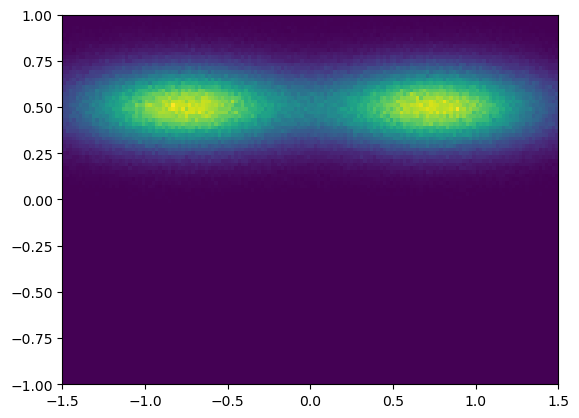

In [20]:
plothist2d(h2);

Let's try a 3D histogram

In [21]:
data3d = [np.random.normal(size=1_000_000) for _ in range(3)]

h3d = bh.Histogram(
    bh.axis.Regular(150, -5, 5),
    bh.axis.Regular(100, -5, 5),
    bh.axis.Regular(100, -5, 5)
)

h3d.fill(*data3d)

Histogram(
  Regular(150, -5, 5),
  Regular(100, -5, 5),
  Regular(100, -5, 5),
  storage=Double()) # Sum: 999998.0 (1000000.0 with flow)

Projection of the first two axes:

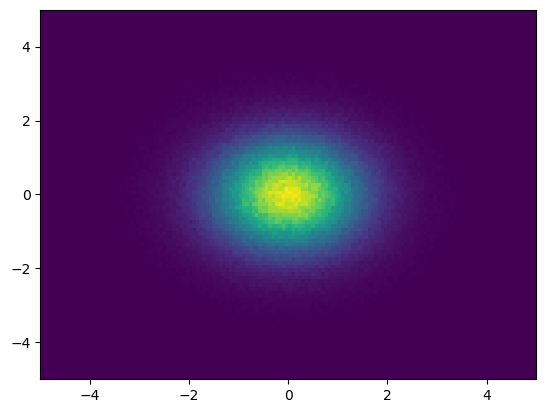

In [22]:
plothist2d(h3d.project(0,1));

### **4. Unified Histogram Indexing**

Let's explore the boost-histogram UHI syntax. We will reuse the previous 2D histogram from part 3:

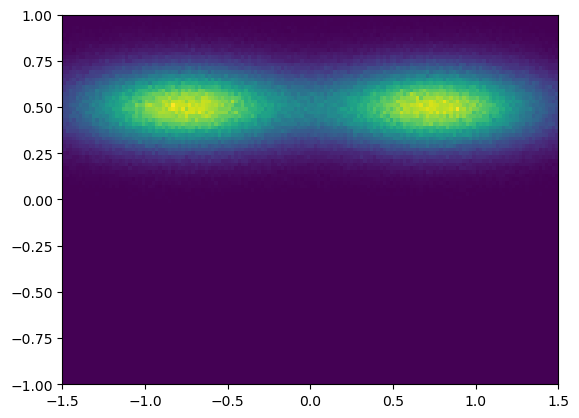

In [23]:
plothist2d(h2);

I can see that I want y from 0.25 to 0.75, in data coordinates:

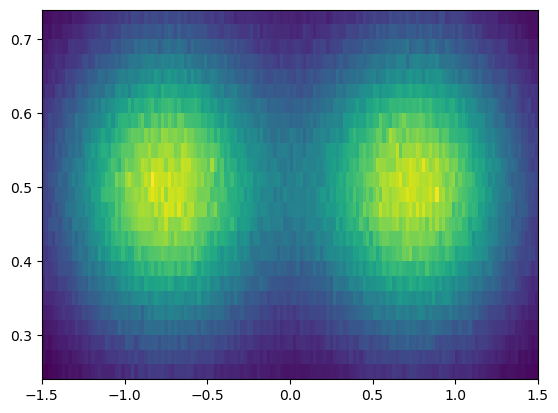

In [24]:
plothist2d(h2[:, bh.loc(.25):bh.loc(.75)]);

What's the contents of a bin?

In [25]:
h2[100,87]

198.0

How about in data coordinates?

In [26]:
h2[bh.loc(.5), bh.loc(.75)]

198.0

> Note: to get the coordinates manually:
> 
> ```python
h2.axes[0].index(.5) == 100
h2.axes[1].index(.75) == 87
```

Let's look at one part and rebin:

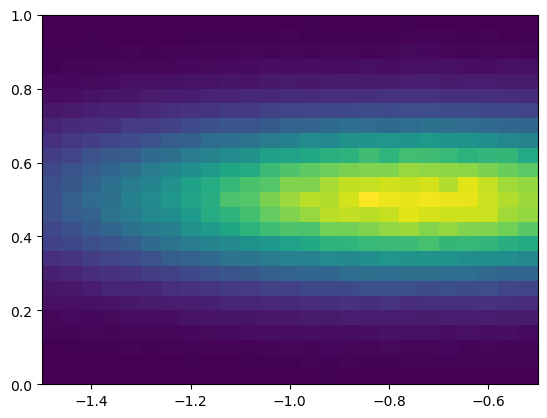

In [27]:
plothist2d(h2[:50:bh.rebin(2), 50::bh.rebin(2)]);

What is the value at `(-.75, .5)`?

In [28]:
h2[bh.loc(-.75), bh.loc(.5)]

994.0

### **5. Fancier axis types - a circular axis example**

In [29]:
h = bh.Histogram(bh.axis.Regular(30, 0, 2*np.pi, circular=True))
h.fill(np.random.uniform(0, np.pi*4, size=300))

Histogram(Regular(30, 0, 6.28319, circular=True), storage=Double()) # Sum: 300.0

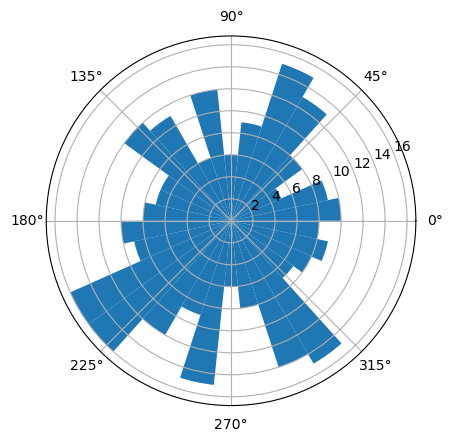

In [30]:
ax = plt.subplot(111, polar=True)

plothist = lambda h: plt.bar(h.axes[0].centers, h, width=h.axes[0].widths)
plothist(h);

### **6. Advanced usage - storage and accumulators**

Explore:
- The extensive list of histogram operations available.
- The rich set of storage types (Double, Int64, Weight, etc.).
- The accumulators defined (Sum, WeightedSum, etc.). Storages store accumulators.

A simple example:

In [31]:
mean = bh.accumulators.Mean()
mean.fill([0.3, 0.4, 0.5])

Mean(count=3, value=0.4, variance=0.01)

In [32]:
h = bh.Histogram(bh.axis.Regular(10, 0, 10), storage=bh.storage.Mean())

h.fill([2.5] * 3, sample=[0.3, 0.4, 0.5])

Histogram(Regular(10, 0, 10), storage=Mean()) # Sum: Mean(count=3, value=0.4, variance=0.01)

In [33]:
print_hist(h.to_numpy())

  0.000 _                                                                                                                                0.133333/row ╷
         
         
  1.000 _
         
         
  2.000 _
         ██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
         ██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
  3.000 _██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
         
         
  4.000 _
         
         
  5.000 _
         
         
  6.000 _
         
         
  7.000 _
         
         
  8.000 _
         
         
  9.000 _
         
         
 10.000 _


&nbsp;<br><center><img src="images/logo_mplhep.png" alt="mplhep package logo" style="width:170px;"/></center>

<center><h2><b><span style="color:green">HEP domain-specific add-ons to matplotlib</span></b></h2></center>

### Package motivation 

- Collection of wrappers for `matplotlib` to more easily produce plots typically needed in HEP.
- Collect styles that are compatible with current collaboration recommendations (ROOT-package-like plots for large [LHC](https://home.cern/science/accelerators/large-hadron-collider) experiments ATLAS, CMS, etc.).

In [34]:
import numpy as np
import matplotlib.pyplot as plt

import mplhep

### **1. Some basics**

Plotting of 1D histograms made easy for "standard" and commonly used looks in HEP:

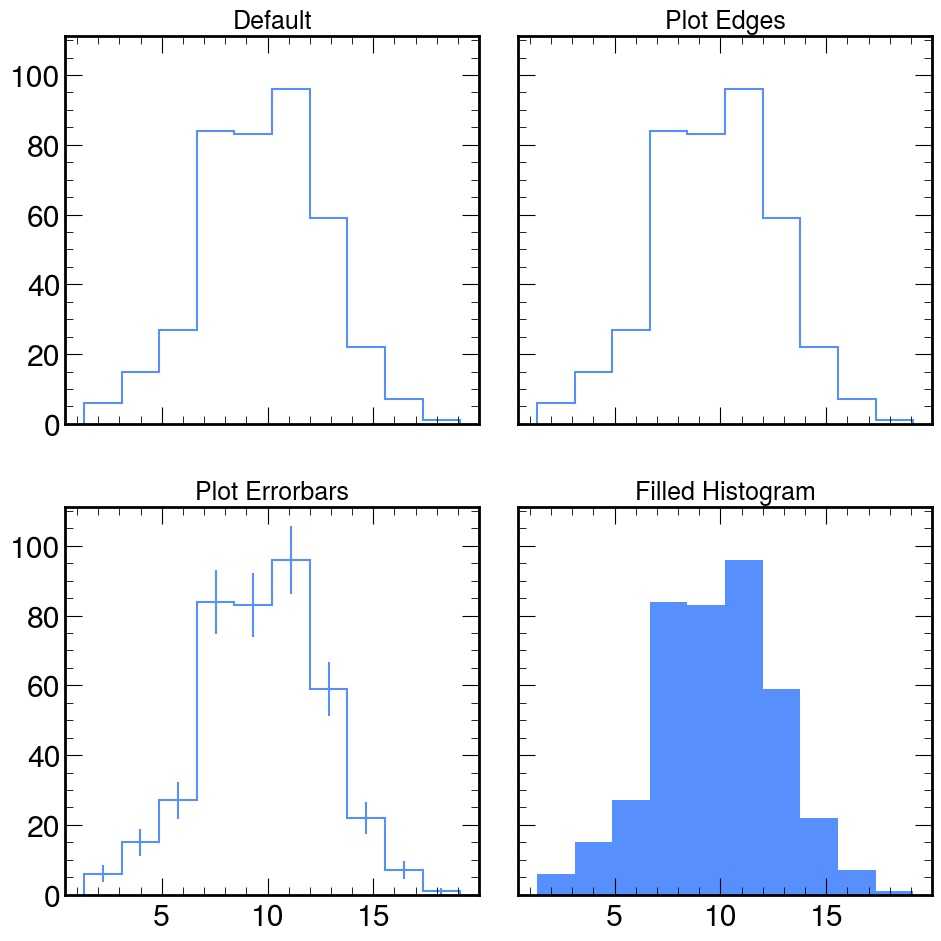

In [35]:
plt.style.use([mplhep.style.ROOT, mplhep.style.firamath])  # see style down in this notebook

h, bins = np.histogram(np.random.normal(10, 3, 400), bins=10)

f, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs = axs.flatten()

axs[0].set_title("Default", fontsize=18)
mplhep.histplot(h, bins, ax=axs[0])

axs[1].set_title("Plot Edges", fontsize=18)
mplhep.histplot(h, bins, edges=True, ax=axs[1])

axs[2].set_title("Plot Errorbars", fontsize=18)
mplhep.histplot(h, bins, yerr=np.sqrt(h), ax=axs[2])

axs[3].set_title("Filled Histogram", fontsize=18)
mplhep.histplot(h, bins, histtype='fill', ax=axs[3])

plt.tight_layout()
plt.show()

It is just as easy to overlay 2, or more, 1D histograms:

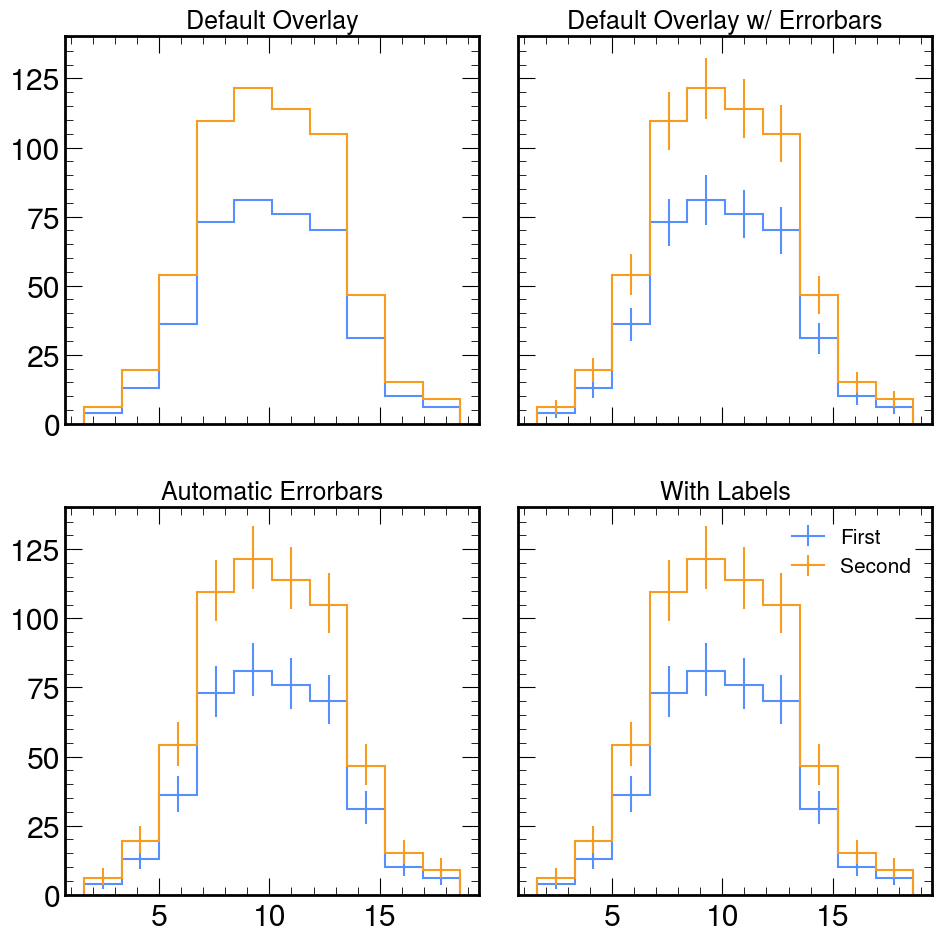

In [36]:
h, bins = np.histogram(np.random.normal(10, 3, 400), bins = 10)

f, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs = axs.flatten()

axs[0].set_title("Default Overlay", fontsize=18)
mplhep.histplot([h, 1.5*h], bins, ax=axs[0])

axs[1].set_title("Default Overlay w/ Errorbars", fontsize=18)
mplhep.histplot([h, 1.5*h], bins, yerr=[np.sqrt(h), np.sqrt(1.5*h)], ax=axs[1])


axs[2].set_title("Automatic Errorbars", fontsize=18)
mplhep.histplot([h, 1.5*h], bins, yerr=True, ax=axs[2])

axs[3].set_title("With Labels", fontsize=18)
mplhep.histplot([h, 1.5*h], bins, yerr=True, ax=axs[3], label=["First", "Second"])

axs[3].legend(fontsize=15)

plt.tight_layout()
plt.show()

In other situations one rather needs to stack a series of 1D histograms. Here is how this can be done:

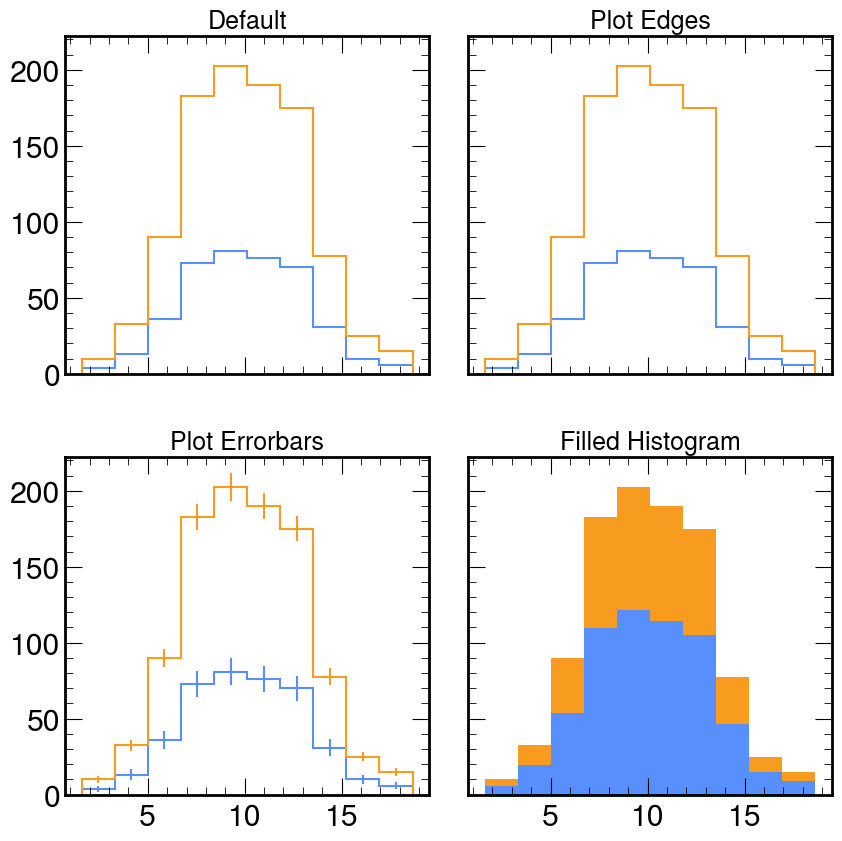

In [37]:
f, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))
axs = axs.flatten()

axs[0].set_title("Default", fontsize=18)
mplhep.histplot([h, 1.5*h], bins, stack=True, ax=axs[0])

axs[1].set_title("Plot Edges", fontsize=18)
mplhep.histplot([h, 1.5*h], bins, edges=True, stack=True,ax=axs[1])

axs[2].set_title("Plot Errorbars", fontsize=18)
mplhep.histplot([h, 1.5*h], bins, yerr=np.sqrt(h), stack=True, ax=axs[2])

axs[3].set_title("Filled Histogram", fontsize=18)
mplhep.histplot([1.5*h, h], bins, histtype='fill', stack=True, ax=axs[3])

plt.tight_layout()
plt.show()

### **2. Fancier plots**

Likewise, `mplhep` provides a simple way to plot 2D histograms.

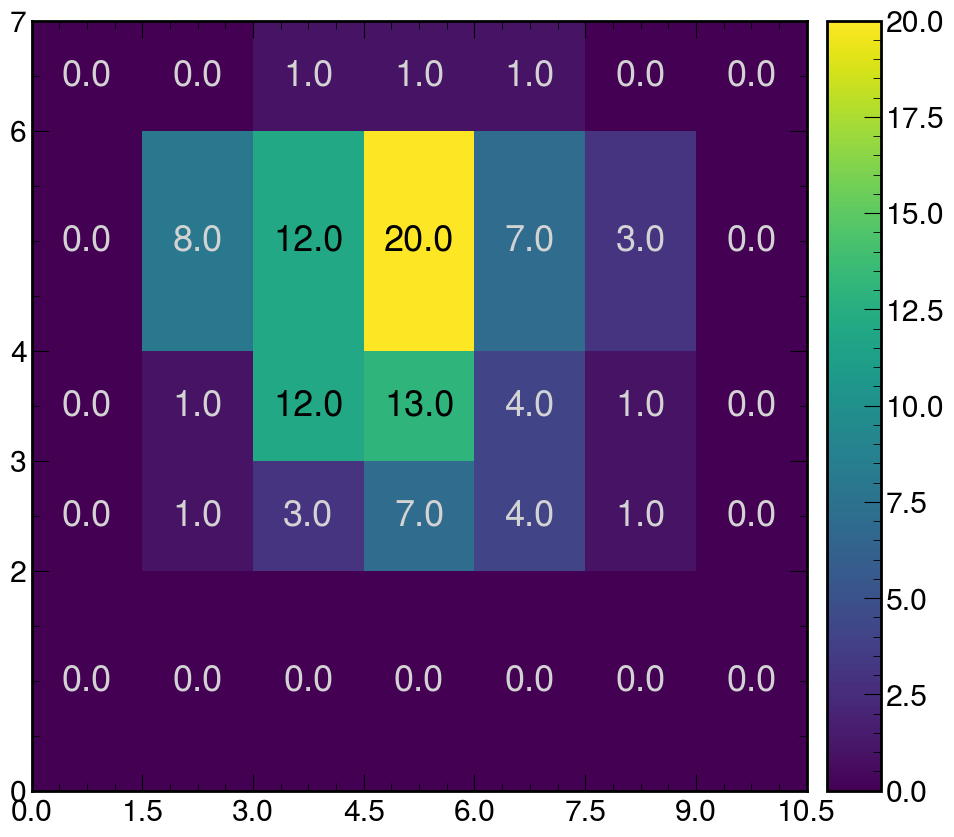

In [38]:
fig, ax = plt.subplots()

xedges = np.arange(0, 11.5, 1.5)
yedges = [0, 2, 3, 4, 6, 7]
x = np.random.normal(5, 1.5, 100)
y = np.random.normal(4, 1, 100)

mplhep.hist2dplot(*np.histogram2d(x, y, bins=(xedges, yedges)), labels=True);

# This would work just as well:
# H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
# mplhep.hist2dplot(H, xedges, yedges, labels=True);

There's no trouble if starting from a `boost-histogram` histogram - just convert it on-the-fly:

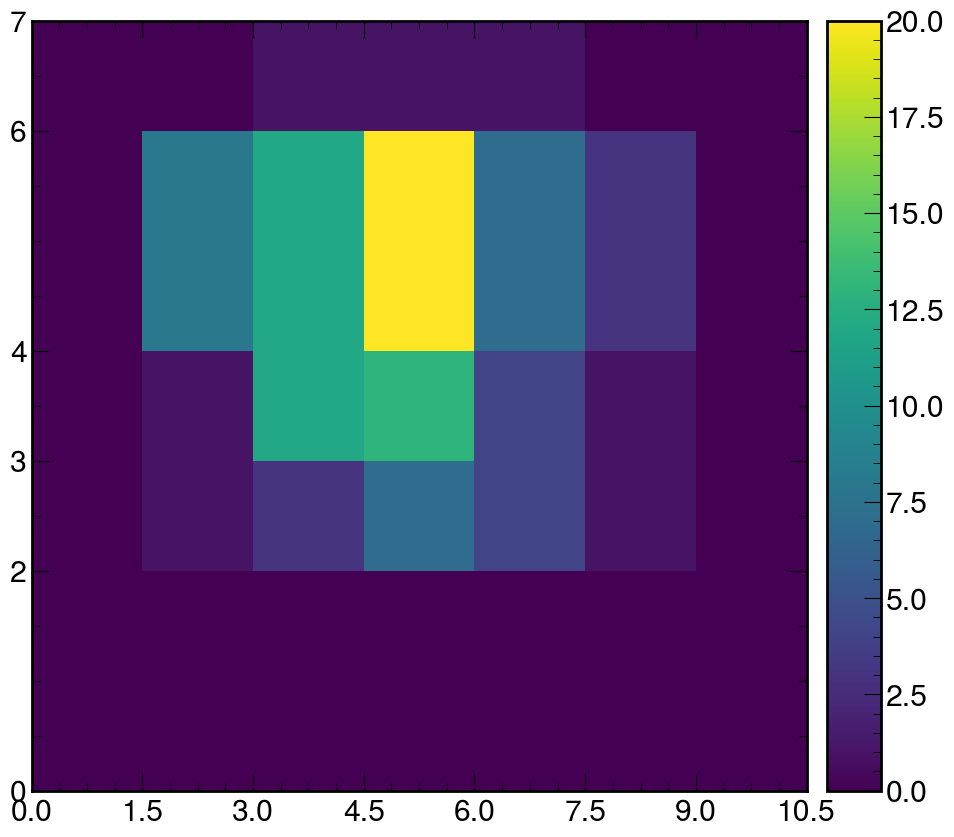

In [39]:
h2 = bh.Histogram(
    bh.axis.Variable(xedges),
    bh.axis.Variable(yedges)
)
h2.fill(x,y)

mplhep.hist2dplot(*h2.to_numpy());

In fact, is the conversion at all necessary? Not anymore, as Boost histograms are supported:

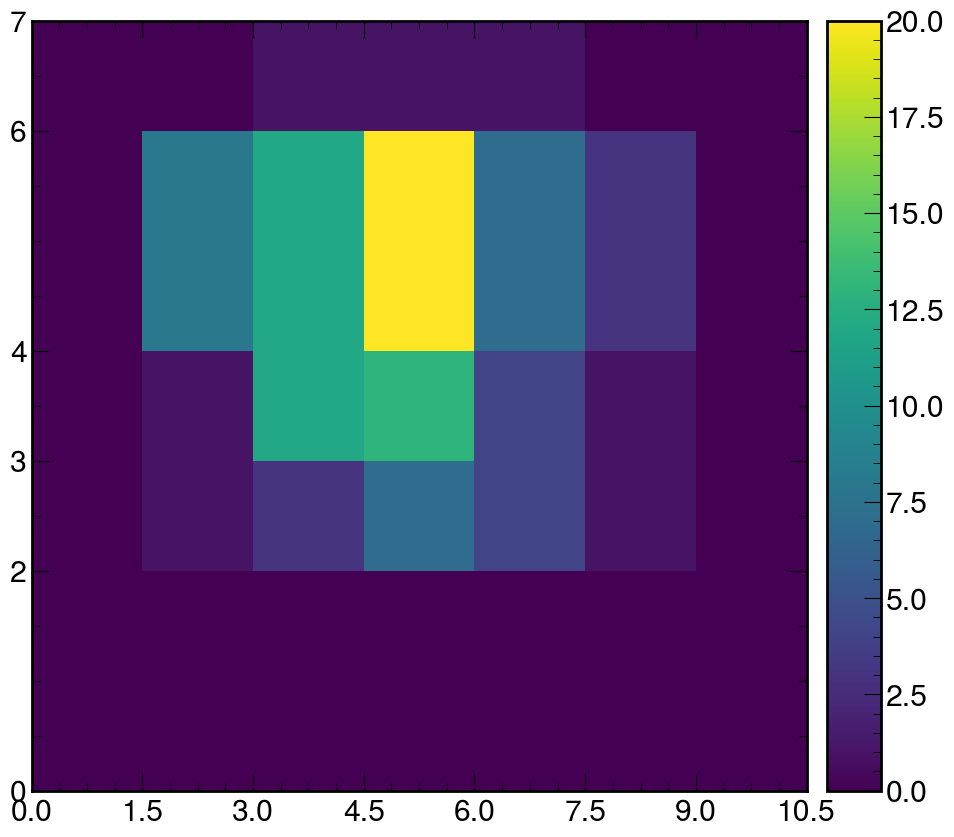

In [40]:
mplhep.hist2dplot(h2);

### **3. Styling**

As said above, several styles are predefined. Here is a simple example:

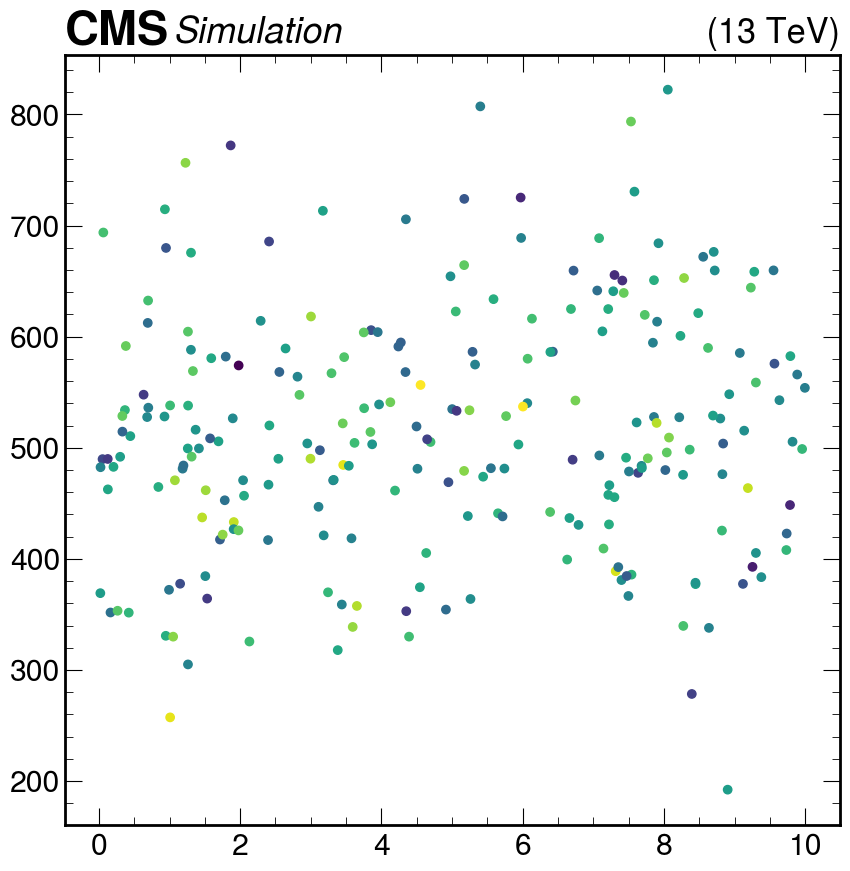

In [41]:
x = np.random.uniform(0, 10, 240)
y = np.random.normal(512, 112, 240)
z = np.random.normal(0.5, 0.1, 240)

plt.style.use([mplhep.style.ROOT, mplhep.style.firamath])  # styles can be chained

f, ax = plt.subplots()
ax.scatter(x,y, c=z, label='XSX')
mplhep.cms.label(loc=0)

plt.show()

&nbsp;<br><center><img src="images/logo_Hist.png" style="width: 150px;"/></center>

<center><h2><b><span style="color:green">Analyst friendly front-end for boost-histogram</span></b></h2></center>

- `Hist` is a powerful, friendly and analysis-focused histogramming tool based on `boost-histogram`.
- It provides some cool shortcuts for histogram creation, plotting tools, and new ideas.

Let's explore the library a bit with some examples. See also the [GitHub repository](https://github.com/scikit-hep/hist) for full documentation.

In [42]:
import hist
from hist import Hist
import numpy as np

### **1. Cool representations in notebooks**

In [43]:
Hist.new.Reg(50, 1, 2).Double().fill(np.random.normal(1.5, 0.3, 10_000))

Hist(Regular(50, 1, 2, label='Axis 0'), storage=Double()) # Sum: 9054.0 (10000.0 with flow)

In [44]:
h2 = Hist.new.Reg(50, 0, 2, name='My preferred x-axis title').Reg(50, 10, 20).Double().fill(
    np.random.normal(1, 0.5, 10_000), np.random.normal(15, 3, 10_000)
)
h2

Hist(
  Regular(50, 0, 2, name='My preferred x-axis title'),
  Regular(50, 10, 20, label='Axis 1'),
  storage=Double()) # Sum: 8642.0 (10000.0 with flow)

In [45]:
Hist.new.Reg(50, 0, 2).Reg(50, 10, 20).Reg(2, 3, 4).Double()

Hist(
  Regular(50, 0, 2, label='Axis 0'),
  Regular(50, 10, 20, label='Axis 1'),
  Regular(2, 3, 4, label='Axis 2'),
  storage=Double())

Based on `boost-histogram`’s Axis, `Hist` supports six types of axis (Regular, Boolean, Variable, Integer, IntCategory and StrCategory), with additional names and labels.

You can checkout `hist.axis` or use the shortcut definitions instead:

In [46]:
# Add the axes using the shortcut method
h = (
    Hist.new.Reg(10, -5, 5, overflow=False, underflow=False, name="A")
    .Bool(name="B")
    .Var(range(10), name="C")
    .Int(-5, 5, overflow=False, underflow=False, name="D")
    .IntCat(range(10), name="E")
    .StrCat(["T", "F"], name="F")
    .Double()
)
h

Hist(
  Regular(10, -5, 5, underflow=False, overflow=False, name='A'),
  Boolean(name='B'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='C'),
  Integer(-5, 5, underflow=False, overflow=False, name='D'),
  IntCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='E'),
  StrCategory(['T', 'F'], name='F'),
  storage=Double())

### **2. Handy plotting functions**

In [47]:
data1 = np.random.normal(3.5, 2.5, size=1_000_000)

h1 = Hist(hist.axis.Regular(40, -2, 10, name="Variable x"), storage=hist.storage.Double())

h1.fill(data1)

Hist(Regular(40, -2, 10, name='Variable x'), storage=Double()) # Sum: 981267.0 (1000000.0 with flow)

The histogram "knows how to plot itself" - very handy for quick checks:

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x0000017F1F537CE0>, errorbar=None, legend_artist=None)]

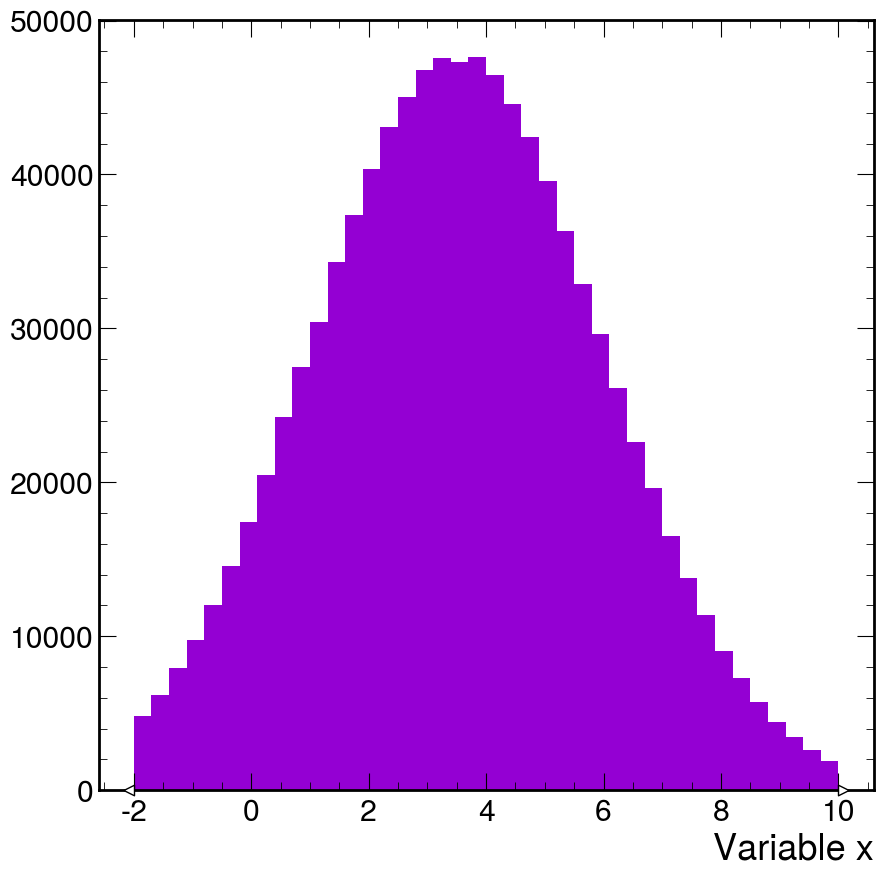

In [48]:
h1.plot(color="darkviolet", lw=3, histtype='fill')

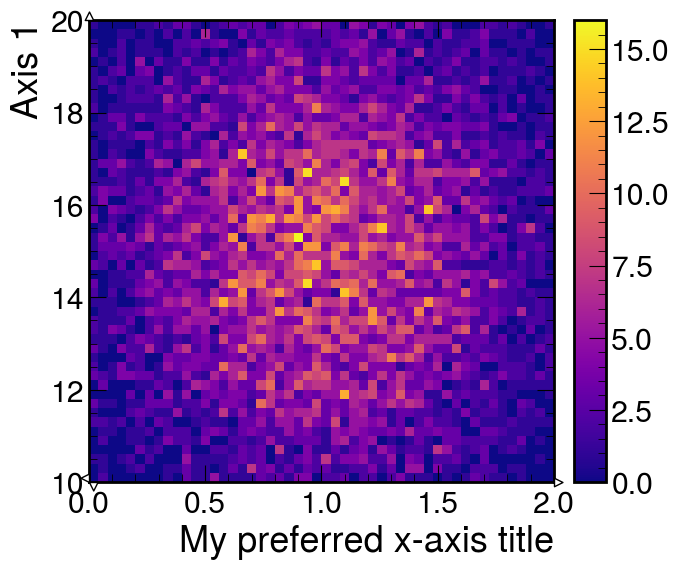

In [49]:
import matplotlib.pyplot as plt
# plot2d
fig, ax = plt.subplots(figsize=(6, 6))

h2.plot2d(ax=ax, cmap="plasma")
plt.show()

This being said, `Hist` talks well with the HEP plotting library `mplhep`:

In [50]:
h = bh.Histogram(
bh.axis.Regular(2, 0, 1, metadata="x"),
bh.axis.Regular(4, 0, 1, metadata="y"))
h.fill(
[.2, .4, .3],
[.3, .5, .2])
h

Histogram(
  Regular(2, 0, 1, metadata='x'),
  Regular(4, 0, 1, metadata='y'),
  storage=Double()) # Sum: 3.0

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x0000017F1FCAD880>, cbar=<matplotlib.colorbar.Colorbar object at 0x0000017F1F4ED430>, text=[])

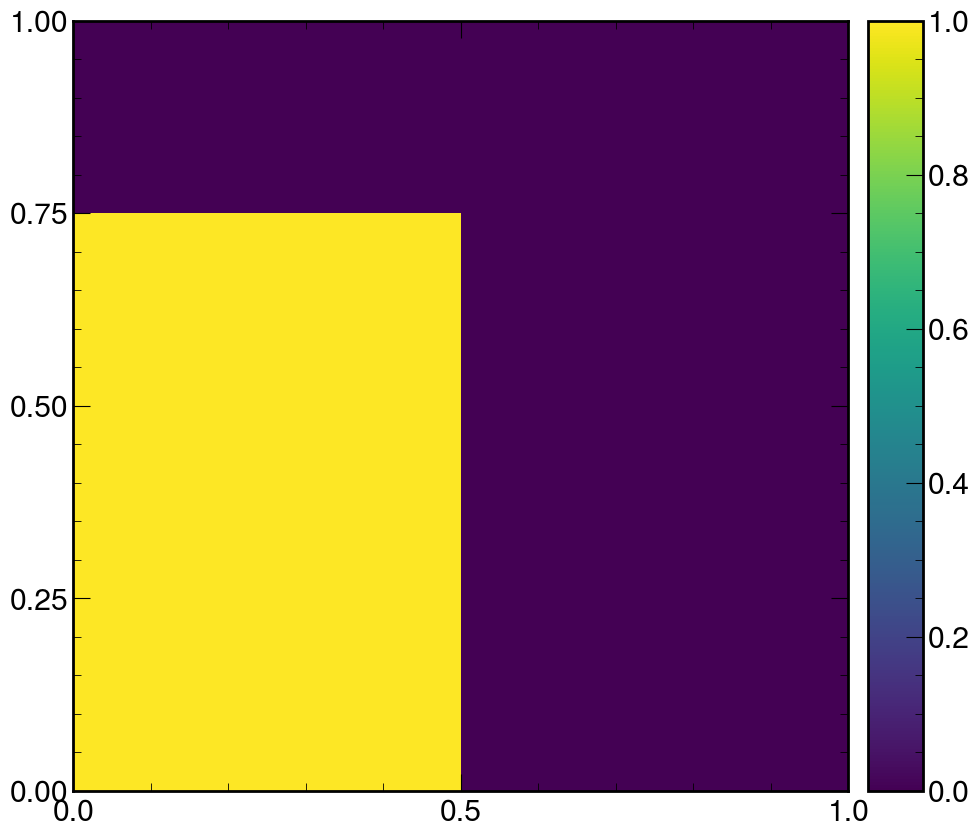

In [51]:
mplhep.hist2dplot(h)

Did we not say "handy plotting functions" and a "powerful, friendly and analysis-focused histogramming tool"? Check this out:

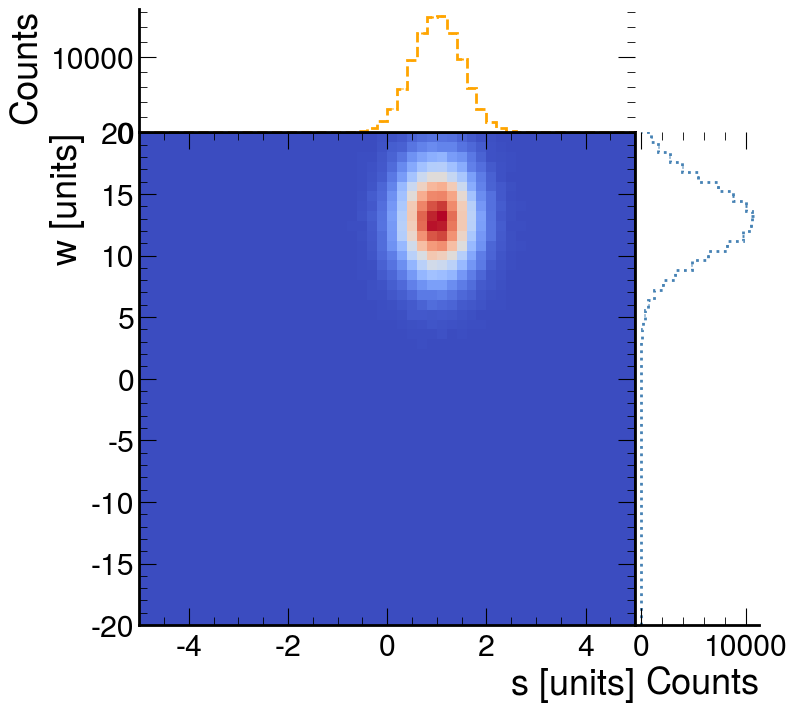

In [52]:
h = Hist(
    hist.axis.Regular(50, -5, 5, name="S", label="s [units]", flow=False),
    hist.axis.Regular(50, -5, 5, name="W", label="w [units]", flow=False),
)

import numpy as np

s_data = np.random.normal(size=10_000) + np.ones(10_000)
w_data = np.random.normal(size=10_000)
s_data = np.random.normal(1, 0.5, 100_000)
w_data = np.random.normal(13, 3, 100_000)

h = Hist.new.Reg(50, -5, 5, name="S", label="s [units]", flow=False).Reg(50, -20, 20, name="W", label="w [units]", flow=False).Double().fill(
    s_data, w_data)

# plot2d_full
plt.figure(figsize=(8, 8))

h.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)

plt.show()

Now we really are mixing all libraries - checking the projections with `mplhep`:

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x0000017F1E6DB170>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

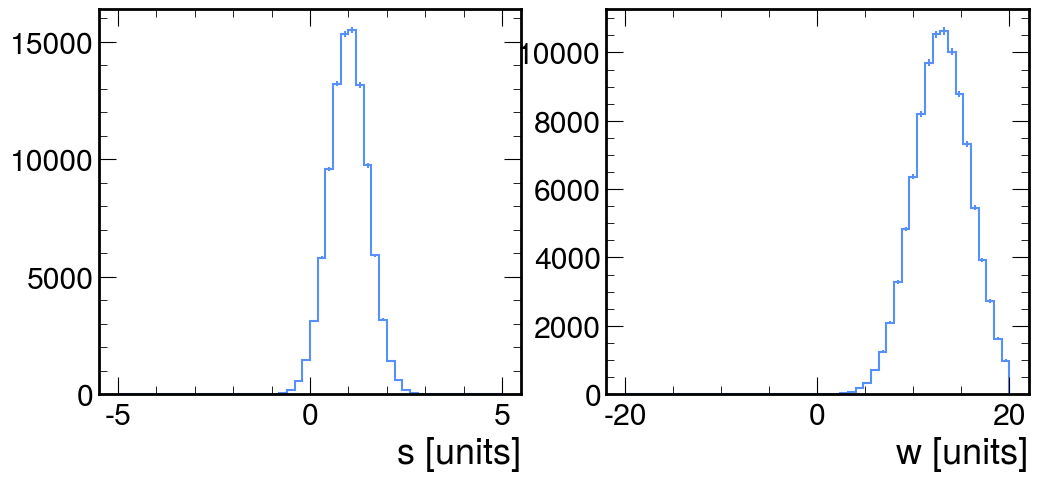

In [53]:
import mplhep

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

mplhep.histplot(h.project("S"), ax=axs[0])
mplhep.histplot(h.project("W"), ax=axs[1])

Pull plots are very commonly used in HEP, e.g. to make sure that a toy study produces unbiased results and returns adequate uncertainties.
`Hist` hence provides a powerful and flexible method for pull studies, called `.plot_pull()`. The method can be passed in a Callable object to be used to fit the plot.

For the sake of argument, let's define a Gaussian function (following the `Hist` documentation):

In [54]:
# The unumpy module of the uncertainties package deals with uncertainties in arrays
from uncertainties import unumpy as unp

def pdf(x, a=1 / np.sqrt(2 * np.pi), x0=0, sigma=1, offset=0):
    exp = unp.exp if a.dtype == np.dtype("O") else np.exp  #  'O' for a Python object
    return a * exp(-((x - x0) ** 2) / (2 * sigma ** 2)) + offset

C:\home\sw\anaconda3\envs\STFC_DIS_2024\Lib\site-packages\hist\plot.py:153: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(


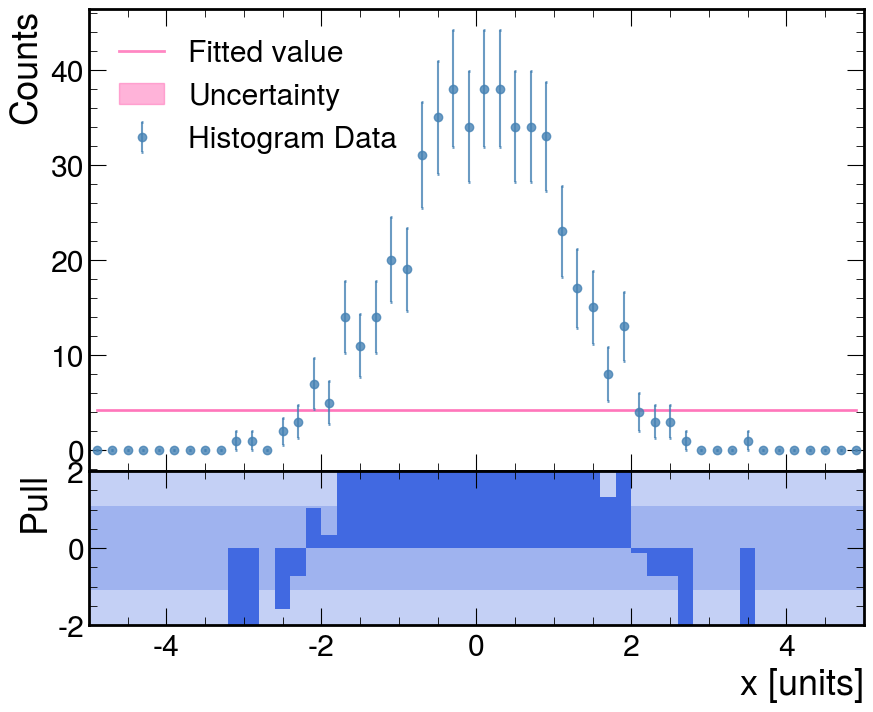

In [55]:
fig = plt.figure(figsize=(10, 8))

# Fill a histogram with 500 entries
hh = hist.Hist(
    hist.axis.Regular(
        50, -5, 5, name="X", label="x [units]", underflow=False, overflow=False
    )
).fill(np.random.normal(size=500))

# Plot the histogram (data points) together with the fitted curve, and the pull plot
main_ax_artists, subplot_ax_artists = hh.plot_pull(
    pdf,  # Normal distributions are so commonly used in pull distributions that the str aliases "normal", "gauss", and "gaus" are supported as well!
    eb_ecolor="steelblue",
    eb_mfc="steelblue",
    eb_mec="steelblue",
    eb_fmt="o",
    eb_ms=6,
    eb_capsize=1,
    eb_capthick=2,
    eb_alpha=0.8,
    fp_c="hotpink",
    fp_ls="-",
    fp_lw=2,
    fp_alpha=0.8,
    bar_fc="royalblue",
    pp_num=5,
    pp_fc="royalblue",
    pp_alpha=0.5,
    pp_ec=None,
    ub_alpha=0.5,
)

plt.ylim((-2,2))

plt.show()